In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)

In [2]:
train=pd.read_excel('data\Data_Train.xlsx')
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
test=pd.read_excel('data\Test_set.xlsx')
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [4]:
print(train.shape)
print(test.shape)

(10683, 11)
(2671, 10)


In [5]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
train[train['Route'].isnull()==True]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [7]:
train=train.dropna()
train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [8]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [10]:
train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

### Date_of_Journey,Dep_Time,Arrival_Time,Duration should be in date-time format. We will do it later. At first we will check the other columns.

In [11]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [12]:
print(f'train airline : {len(train["Airline"].unique())}')
np.sort(train['Airline'].unique())

train airline : 12


array(['Air Asia', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet',
       'Vistara', 'Vistara Premium economy'], dtype=object)

In [13]:
print(f'test airline : {len(test["Airline"].unique())}')
np.sort(test['Airline'].unique())

test airline : 11


array(['Air Asia', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Vistara',
       'Vistara Premium economy'], dtype=object)

### Airline Trujet which presents in train data is not present in test data and it has only 1 value so we will delete this row.

In [14]:
train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [15]:
### Since Trujet Airline have only one value we can delete this

In [16]:
train[train['Airline']=='Trujet']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2878,Trujet,6/03/2019,Mumbai,Hyderabad,BOM → NDC → HYD,13:05,16:20,3h 15m,1 stop,No info,4140


In [17]:
train=train.drop(index=2878)

In [18]:
print(np.sort(train['Source'].unique()))
train['Source'].value_counts()

['Banglore' 'Chennai' 'Delhi' 'Kolkata' 'Mumbai']


Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       696
Chennai      381
Name: Source, dtype: int64

In [19]:
print(np.sort(test['Source'].unique()))

['Banglore' 'Chennai' 'Delhi' 'Kolkata' 'Mumbai']


In [20]:
train['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [21]:
test['Destination'].unique()

array(['Cochin', 'Banglore', 'Delhi', 'New Delhi', 'Hyderabad', 'Kolkata'],
      dtype=object)

In [22]:
train['Destination'] = train['Destination'].replace('New Delhi','Delhi')

In [23]:
test['Destination'] = test['Destination'].replace('New Delhi','Delhi')

In [24]:
train['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [25]:
test["Total_Stops"].unique()

array(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'],
      dtype=object)

In [26]:
print(len(train['Additional_Info'].unique()))
np.sort(train['Additional_Info'].unique())

10


array(['1 Long layover', '1 Short layover', '2 Long layover',
       'Business class', 'Change airports', 'In-flight meal not included',
       'No Info', 'No check-in baggage included', 'No info',
       'Red-eye flight'], dtype=object)

### convert 'No Info' ---->'No info'

In [27]:
train['Additional_Info']=train['Additional_Info'].replace('No info','No Info')

In [28]:
print(len(train['Additional_Info'].unique()))
np.sort(train['Additional_Info'].unique())

9


array(['1 Long layover', '1 Short layover', '2 Long layover',
       'Business class', 'Change airports', 'In-flight meal not included',
       'No Info', 'No check-in baggage included', 'Red-eye flight'],
      dtype=object)

In [29]:
np.sort(test['Additional_Info'].unique())

array(['1 Long layover', 'Business class', 'Change airports',
       'In-flight meal not included', 'No check-in baggage included',
       'No info'], dtype=object)

In [30]:
np.sort(train['Price'].unique())

array([ 1759,  1840,  1965, ..., 57209, 62427, 79512], dtype=int64)

### Price : 1759 to 79512

### Next Task : Convert columns to date-time format
#### 1)Date_of_Journey
#### 2)Dep_Time
#### 3)Arrival_Time
#### 4)Duration

In [31]:
train_copy=train.copy()

### 1)Date_of_Journey

In [32]:
train_copy['Date_of_Journey']=pd.to_datetime(train_copy['Date_of_Journey'])

In [33]:
train_copy.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

### Extracting Day and month from Date_of_Journey column (train)

In [34]:
train_copy['Date_of_Journey_day']=train_copy['Date_of_Journey'].dt.day
train_copy['Date_of_Journey_month']=train_copy['Date_of_Journey'].dt.month

### Extracting Day and month from Date_of_Journey column (test)

In [35]:
test_copy=test.copy()
test_copy['Date_of_Journey']=pd.to_datetime(test_copy['Date_of_Journey'])
test_copy['Date_of_journey_quarter'] = test_copy['Date_of_Journey'].dt.quarter
test_copy['Date_of_Journey_day']=test_copy['Date_of_Journey'].dt.day
test_copy['Date_of_Journey_month']=test_copy['Date_of_Journey'].dt.month

In [36]:
train_copy.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_day,Date_of_Journey_month
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No Info,3897,24,3


### 2) Dep_Time

In [37]:
train_copy["Dep_hour"] = pd.to_datetime(train_copy["Dep_Time"]).dt.hour
train_copy["Dep_min"] = pd.to_datetime(train_copy["Dep_Time"]).dt.minute

In [38]:
test_copy["Dep_hour"] = pd.to_datetime(test_copy["Dep_Time"]).dt.hour

test_copy["Dep_min"] = pd.to_datetime(test_copy["Dep_Time"]).dt.minute

### 3)Arrival_time

In [39]:
train_copy["Arrival_Time_hour"] = pd.to_datetime(train_copy["Arrival_Time"]).dt.hour
train_copy["Arrival_Time_min"] = pd.to_datetime(train_copy["Arrival_Time"]).dt.minute

In [40]:
test_copy["Arrival_Time_hour"] = pd.to_datetime(test_copy["Arrival_Time"]).dt.hour
test_copy["Arrival_Time_min"] = pd.to_datetime(test_copy["Arrival_Time"]).dt.minute

In [41]:
train_copy.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_day,Date_of_Journey_month,Dep_hour,Dep_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No Info,3897,24,3,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No Info,7662,5,1,5,50,13,15


### 4)Duration

In [42]:
duration = list(train_copy["Duration"])

for i in range(len(duration)):
    for i in range(len(duration)):
        if len(duration[i].split()) != 2:
            if "h" in duration[i]:
                duration[i] = duration[i].strip() + " 0m" 
            else:
                duration[i] = "0h " + duration[i]
            
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [43]:
train_copy["Duration_hours"] = duration_hours
train_copy["Duration_mins"] = duration_mins

In [44]:
train_copy.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_day,Date_of_Journey_month,Dep_hour,Dep_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No Info,3897,24,3,22,20,1,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No Info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No Info,13882,6,9,9,25,4,25,19,0


In [45]:
duration = list(test_copy["Duration"])

for i in range(len(duration)):
    for i in range(len(duration)):
        if len(duration[i].split()) != 2:
            if "h" in duration[i]:
                duration[i] = duration[i].strip() + " 0m" 
            else:
                duration[i] = "0h " + duration[i]
            
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [46]:
test_copy["Duration_hours"] = duration_hours
test_copy["Duration_mins"] = duration_mins

In [47]:
test_copy.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date_of_journey_quarter,Date_of_Journey_day,Date_of_Journey_month,Dep_hour,Dep_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,2,6,6,17,30,4,25,10,55
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,4,5,12,6,20,10,20,4,0
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,2,21,5,19,15,19,0,23,45


In [48]:
train_copy.dtypes

Airline                          object
Date_of_Journey          datetime64[ns]
Source                           object
Destination                      object
Route                            object
Dep_Time                         object
Arrival_Time                     object
Duration                         object
Total_Stops                      object
Additional_Info                  object
Price                             int64
Date_of_Journey_day               int64
Date_of_Journey_month             int64
Dep_hour                          int64
Dep_min                           int64
Arrival_Time_hour                 int64
Arrival_Time_min                  int64
Duration_hours                    int64
Duration_mins                     int64
dtype: object

In [49]:
train_copy['total_duration_mins']=train_copy['Duration_hours']*60+train_copy['Duration_mins']

In [50]:
train_copy.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_day,Date_of_Journey_month,Dep_hour,Dep_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins,total_duration_mins
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No Info,3897,24,3,22,20,1,10,2,50,170
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No Info,7662,5,1,5,50,13,15,7,25,445


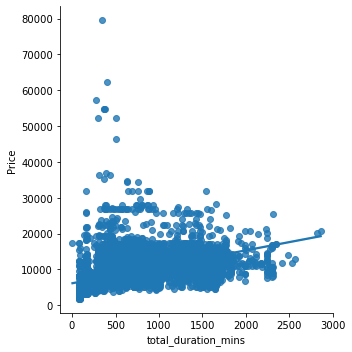

In [51]:
sns.lmplot(x='total_duration_mins',y='Price',data=train_copy)

In [52]:
test_copy['total_duration_mins']=test_copy['Duration_hours']*60+test_copy['Duration_mins']

### Next Task :Handling Categorical Columns
#### 1)Airline
#### 2)Source
#### 3)Destination
#### 4)Total_Stops
#### 5)Additional_info

### Categorical Data are of two Types----
#### a) Nominal : No order w.r.t. the category. Eg : Gender --> OneHotEncoding 
#### b) Ordinnal : data are in order. Eg : Education Qualification --> LabelEncoding

### 1) Airline

In [53]:
train_copy["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Name: Airline, dtype: int64

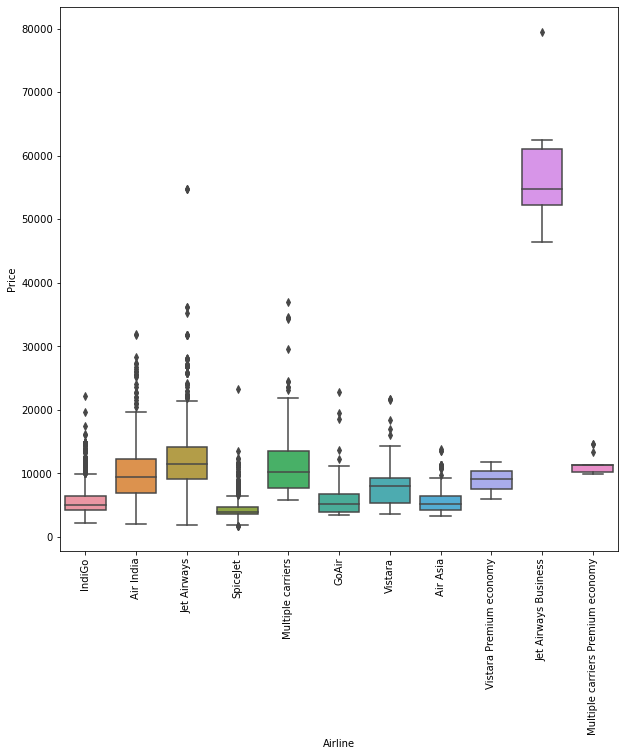

In [54]:
plt.figure(figsize=(10,10))
sns.boxplot(x=train_copy['Airline'],y=train_copy['Price'])
plt.xticks(rotation=90)
plt.show()

In [55]:
airline_labels=train_copy.groupby(['Airline'])['Price'].mean().sort_values().index
airline_labels={k:i for i,k in enumerate(airline_labels)}
train_copy['Airline']=train_copy["Airline"].map(airline_labels)

In [56]:
test_copy['Airline']=test_copy["Airline"].map(airline_labels)

In [57]:
airline_labels

{'SpiceJet': 0,
 'Air Asia': 1,
 'IndiGo': 2,
 'GoAir': 3,
 'Vistara': 4,
 'Vistara Premium economy': 5,
 'Air India': 6,
 'Multiple carriers': 7,
 'Multiple carriers Premium economy': 8,
 'Jet Airways': 9,
 'Jet Airways Business': 10}

### 2)Source

In [58]:
train_copy['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [59]:
source_labels = train_copy.groupby(['Source'])['Price'].mean().sort_values().index
source_labels = {k:i for i,k in enumerate(source_labels)}
train_copy['Source'] = train_copy['Source'].map(source_labels)

In [60]:
source_labels

{'Chennai': 0, 'Mumbai': 1, 'Banglore': 2, 'Kolkata': 3, 'Delhi': 4}

In [61]:
test_copy['Source'] = test_copy['Source'].map(source_labels)

### 3) Destination

In [62]:
train_copy['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [63]:
destination_labels=train_copy.groupby(['Destination'])['Price'].mean().sort_values().index
destination_labels={j:i for i,j in enumerate(destination_labels)}
train_copy['Destination'] = train_copy['Destination'].map(destination_labels)

In [64]:
destination_labels

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [65]:
test_copy['Destination'] = test_copy['Destination'].map(destination_labels)

###  4)total Stops

In [66]:
train_copy['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [67]:
stop = {
    'non-stop' : 0,
    '1 stop' : 1,
    '2 stops' : 2,
    '3 stops' : 3,
    '4 stops' : 4
              }
train_copy['Total_Stops'] = train_copy['Total_Stops'].replace(stop)

In [68]:
test_copy['Total_Stops'] = test_copy['Total_Stops'].replace(stop)

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

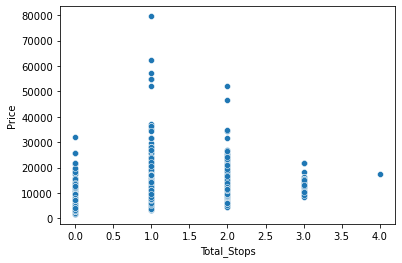

In [69]:
sns.scatterplot(x=train_copy['Total_Stops'],y=train_copy['Price'])

### 5)Additional Info

In [70]:
train_copy['Additional_Info'].value_counts()/len(train_copy['Additional_Info'])*100

No Info                         78.138751
In-flight meal not included     18.556315
No check-in baggage included     2.995974
1 Long layover                   0.177886
Change airports                  0.065537
Business class                   0.037450
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: Additional_Info, dtype: float64

### Additional info coolumn has more than 78% of no information So we will drop this.

In [71]:
train_copy = train_copy.drop(columns=['Additional_Info'])

In [72]:
test_copy = test_copy.drop(columns=['Additional_Info'])


In [73]:
train_copy[['Airline','Source','Destination','Total_Stops','Date_of_Journey_day','Date_of_Journey_month','Dep_hour','Dep_min','Arrival_Time_hour','Arrival_Time_min','total_duration_mins','Price']]

,Airline,Source,Destination,Total_Stops,Date_of_Journey_day,Date_of_Journey_month,Dep_hour,Dep_min,Arrival_Time_hour,Arrival_Time_min,total_duration_mins,Price
0,2,2,2,0,24,3,22,20,1,10,170,3897
1,6,3,3,2,5,1,5,50,13,15,445,7662
2,9,4,4,2,6,9,9,25,4,25,1140,13882
3,2,3,3,1,5,12,18,5,23,30,325,6218
4,2,2,2,1,3,1,16,50,21,35,285,13302
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,1,3,3,0,4,9,19,55,22,25,150,4107
10679,6,3,3,0,27,4,20,45,23,20,155,4145
10680,9,2,2,0,27,4,8,20,11,20,180,7229
10681,4,2,2,0,3,1,11,30,14,10,160,12648


In [74]:
train_copy=train_copy[['Airline','Source','Destination','Total_Stops','Date_of_Journey_day','Date_of_Journey_month','Dep_hour','Dep_min','Arrival_Time_hour','Arrival_Time_min','total_duration_mins','Price']]
train_copy.head()

,Airline,Source,Destination,Total_Stops,Date_of_Journey_day,Date_of_Journey_month,Dep_hour,Dep_min,Arrival_Time_hour,Arrival_Time_min,total_duration_mins,Price
0,2,2,2,0,24,3,22,20,1,10,170,3897
1,6,3,3,2,5,1,5,50,13,15,445,7662
2,9,4,4,2,6,9,9,25,4,25,1140,13882
3,2,3,3,1,5,12,18,5,23,30,325,6218
4,2,2,2,1,3,1,16,50,21,35,285,13302


In [75]:
test_copy=test_copy[['Airline','Source','Destination','Total_Stops','Date_of_Journey_day','Date_of_Journey_month','Dep_hour','Dep_min','Arrival_Time_hour','Arrival_Time_min','total_duration_mins']]
test_copy.head()

,Airline,Source,Destination,Total_Stops,Date_of_Journey_day,Date_of_Journey_month,Dep_hour,Dep_min,Arrival_Time_hour,Arrival_Time_min,total_duration_mins
0,9,4,4,1,6,6,17,30,4,25,655
1,2,3,3,1,5,12,6,20,10,20,240
2,9,4,4,1,21,5,19,15,19,0,1425
3,7,4,4,1,21,5,8,0,21,0,780
4,1,2,2,0,24,6,23,55,2,45,170


In [76]:
train_copy.corr()

,Airline,Source,Destination,Total_Stops,Date_of_Journey_day,Date_of_Journey_month,Dep_hour,Dep_min,Arrival_Time_hour,Arrival_Time_min,total_duration_mins,Price
Airline,1.000000,0.275590,0.275590,0.444732,-0.030532,0.060707,0.039247,-0.080299,0.072623,-0.108114,0.478924,0.591434
Source,0.275590,1.000000,1.000000,0.591078,0.071843,0.041416,-0.035164,-0.117835,0.028499,-0.148732,0.432551,0.358871
Destination,0.275590,1.000000,1.000000,0.591078,0.071843,0.041416,-0.035164,-0.117835,0.028499,-0.148732,0.432551,0.358871
Total_Stops,0.444732,0.591078,0.591078,1.000000,-0.024110,0.065491,-0.061479,-0.002593,0.038130,-0.106933,0.738122,0.603958
Date_of_Journey_day,-0.030532,0.071843,0.071843,-0.024110,1.000000,-0.264895,-0.002292,-0.016541,-0.002136,-0.021454,-0.038455,-0.165577
Date_of_Journey_month,0.060707,0.041416,0.041416,0.065491,-0.264895,1.000000,0.028188,0.002151,-0.004335,-0.025782,0.055151,0.010722
Dep_hour,0.039247,-0.035164,-0.035164,-0.061479,-0.002292,0.028188,1.000000,-0.024738,0.005176,0.067914,0.002096,0.006809
Dep_min,-0.080299,-0.117835,-0.117835,-0.002593,-0.016541,0.002151,-0.024738,1.000000,0.043162,-0.017625,-0.019186,-0.024564
Arrival_Time_hour,0.072623,0.028499,0.028499,0.038130,-0.002136,-0.004335,0.005176,0.043162,1.000000,-0.154355,0.051566,0.024284
Arrival_Time_min,-0.108114,-0.148732,-0.148732,-0.106933,-0.021454,-0.025782,0.067914,-0.017625,-0.154355,1.000000,-0.069690,-0.086189


### Feature Selection

In [77]:
from sklearn.feature_selection import mutual_info_regression

In [78]:
X=train_copy.drop(columns='Price')
y=train_copy['Price']

In [79]:
imp_col=pd.DataFrame(mutual_info_regression(X,y),index=X.columns)
imp_col.columns = ['Importance']

In [80]:
imp_col.sort_values(by='Importance',ascending=False)

,Importance
Source,1.007626
Destination,1.003913
Airline,0.799807
Total_Stops,0.793327
total_duration_mins,0.490022
Arrival_Time_hour,0.405784
Arrival_Time_min,0.348904
Dep_hour,0.339748
Dep_min,0.255511
Date_of_Journey_month,0.248060


### Model Building

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [83]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
import warnings

In [84]:
def model(model_name):
    model_name.fit(X_train,y_train)
    y_pred_train = model_name.predict(X_train)
    y_pred_test = model_name.predict(X_test)
    
    r2_score_train = r2_score(y_train,y_pred_train)
    r2_score_test = r2_score(y_test,y_pred_test)

    mae_train = mean_absolute_error(y_train,y_pred_train)
    mae_test = mean_absolute_error(y_test,y_pred_test)

    mse_train = mean_squared_error(y_train,y_pred_train)
    mse_test = mean_squared_error(y_test,y_pred_test)
    
    print(str(model_name).split('()')[0])
    pd.options.display.float_format = '{:.4f}'.format
    return pd.DataFrame(data=[[r2_score_train*100,r2_score_test*100],[mae_train,mae_test],[mse_train,mse_test]],columns=['train','test'],index=['R2_score','Mean Absolute Error','Mean Squared Error'])

In [150]:
model(DecisionTreeRegressor())

DecisionTreeRegressor


,train,test
R2_score,97.1081,71.3788
Mean Absolute Error,306.8630,1367.8703
Mean Squared Error,613505.3063,6124452.9961


In [151]:
model(RandomForestRegressor())

RandomForestRegressor


,train,test
R2_score,95.1618,82.5722
Mean Absolute Error,577.7726,1151.2148
Mean Squared Error,1026406.6859,3729252.6277


In [152]:
model(XGBRegressor())

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


,train,test
R2_score,93.6714,84.3263
Mean Absolute Error,812.5145,1160.6353
Mean Squared Error,1342588.5694,3353905.2091


In [153]:
model(SVR())

SVR


,train,test
R2_score,14.9687,16.0030
Mean Absolute Error,3065.5465,3091.0665
Mean Squared Error,18039017.4933,17973919.3077


### XGBRegressor and Random Forest Regressor give best result. We will evaluate these two.

In [154]:
np.mean(cross_val_score(XGBRegressor(),X_test,y_test,cv=10))

0.759366014350632

In [155]:
np.mean(cross_val_score(RandomForestRegressor(),X_test,y_test,cv=10))

0.7823883564675334

### After cross validation Random forest is giving higher R2 score value.

In [156]:
rf=RandomForestRegressor(n_estimators=700,max_depth=13,random_state=1)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [157]:
r2_score(y_test,y_pred)

0.8452080468124882

### r2 score 84.52%

In [158]:
rf.predict(X_test)

array([ 9821.64267928,  6134.30264673, 10142.0975321 , ...,
        7466.26674652,  6486.34827875,  6617.68762514])

In [159]:
print(f'Mean Absolute Error - {mean_absolute_error(y_test,y_pred)}')
print(f'Mean Square Error - {mean_squared_error(y_test,y_pred)}')
print(f'Root Mean Square Error - {np.sqrt(mean_squared_error(y_test,y_pred))}')

Mean Absolute Error - 1122.1813390736515
Mean Square Error - 3312282.736909342
Root Mean Square Error - 1819.9677845800848


In [359]:
import pickle

In [483]:
pickle.dump(rf,open('rf.pkl','wb'))

In [372]:
train['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy'], dtype=object)

In [484]:
train['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [485]:
train['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [376]:
train['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     696
Kolkata       381
Name: Destination, dtype: int64

In [489]:
train["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [492]:
train_copy

,Airline,Source,Destination,Total_Stops,Date_of_Journey_day,Date_of_Journey_month,Dep_hour,Dep_min,Arrival_Time_hour,Arrival_Time_min,total_duration_mins,Price
0,2,2,2,0,24,3,22,20,1,10,170,3897
1,6,3,3,2,5,1,5,50,13,15,445,7662
2,9,4,4,2,6,9,9,25,4,25,1140,13882
3,2,3,3,1,5,12,18,5,23,30,325,6218
4,2,2,2,1,3,1,16,50,21,35,285,13302
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,1,3,3,0,4,9,19,55,22,25,150,4107
10679,6,3,3,0,27,4,20,45,23,20,155,4145
10680,9,2,2,0,27,4,8,20,11,20,180,7229
10681,4,2,2,0,3,1,11,30,14,10,160,12648


In [14]:
a=str(12)
b=str(3)

In [3]:
import datetime

In [5]:
.import pandas as pd

In [21]:
time = pd.to_datetime(a+ ':' + b,format='%H:%M')

In [41]:
c=time.strftime('%H:%M')

In [43]:
time

Timestamp('1900-01-01 12:03:00')

In [160]:
train_copy.dtypes

Airline                  int64
Source                   int64
Destination              int64
Total_Stops              int64
Date_of_Journey_day      int64
Date_of_Journey_month    int64
Dep_hour                 int64
Dep_min                  int64
Arrival_Time_hour        int64
Arrival_Time_min         int64
total_duration_mins      int64
Price                    int64
dtype: object

In [165]:
rf.predict([[6,3,3,2,5,1,5,50,13,15,445]])

C:\Anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([8052.64176338])

In [166]:
train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No Info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No Info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No Info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No Info,6218
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No Info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No Info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No Info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No Info,7229
10681,Vistara,01/03/2019,Banglore,Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No Info,12648


In [193]:
time = datetime.datetime(2023,5,31,4,25)-datetime.datetime(2023,5,30,9,25) 
dt = datetime.datetime.strptime(str(time),'%H:%M:%S')
total_duration_mins = dt.hour*60+dt.minute

1140

In [ ]:
airline = 'Air Asia'

In [195]:
airline_dict = {'SpiceJet': 0,
 'Air Asia': 1,
 'IndiGo': 2,
 'GoAir': 3,
 'Vistara': 4,
 'Vistara Premium economy': 5,
 'Air India': 6,
 'Multiple carriers': 7,
 'Multiple carriers Premium economy': 8,
 'Jet Airways': 9,
 'Jet Airways Business': 10}

In [219]:
name=input('')
def airline_name(name):
    airline = airline_dict[name]
    return airline

'Spicejet'


In [231]:
a='SpiceJet'

In [234]:
int(a.replace(a,str(airline_dict[a])))

0

In [228]:
airline_dict['SpiceJet']

0

In [237]:
train_copy

,Airline,Source,Destination,Total_Stops,Date_of_Journey_day,Date_of_Journey_month,Dep_hour,Dep_min,Arrival_Time_hour,Arrival_Time_min,total_duration_mins,Price
0,2,2,2,0,24,3,22,20,1,10,170,3897
1,6,3,3,2,5,1,5,50,13,15,445,7662
2,9,4,4,2,6,9,9,25,4,25,1140,13882
3,2,3,3,1,5,12,18,5,23,30,325,6218
4,2,2,2,1,3,1,16,50,21,35,285,13302
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,1,3,3,0,4,9,19,55,22,25,150,4107
10679,6,3,3,0,27,4,20,45,23,20,155,4145
10680,9,2,2,0,27,4,8,20,11,20,180,7229
10681,4,2,2,0,3,1,11,30,14,10,160,12648


In [91]:
rf.predict([[2,2,2,0,30,5,22,20,1,10,170]])

C:\Anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([4122.40897203])

In [88]:
import pickle

In [89]:
rf=pickle.load(open('rf.pkl','rb'))

In [98]:
train_copy['total_duration_mins'].sort_values(ascending=False)

10456    2860
1067     2820
8409     2565
5953     2525
7906     2480
         ... 
10297      75
10384      75
6573       75
3986       75
6474        5
Name: total_duration_mins, Length: 10681, dtype: int64

In [99]:
import datetime

In [155]:
a=datetime.datetime(2023,6,24,5,30) - datetime.datetime(2023,6,24,12,35)
a.days*24*60 +(a.seconds/60)

-425.0

In [150]:
a.days*24*60 +(a.seconds/60)

1620.0

In [149]:
a.seconds/60

180.0

In [144]:
a

datetime.timedelta(days=11, seconds=10800)

In [142]:
train_copy.sample(4)

,Airline,Source,Destination,Total_Stops,Date_of_Journey_day,Date_of_Journey_month,Dep_hour,Dep_min,Arrival_Time_hour,Arrival_Time_min,total_duration_mins,Price
398,6,2,2,0,3,9,17,0,19,45,165,10741
7574,9,4,4,2,24,6,5,30,12,35,425,14441
6842,2,2,2,0,24,3,10,10,13,0,170,10067
131,9,4,4,1,15,6,11,30,4,25,1015,10262


In [158]:
a=np.array(1)

In [161]:
a.

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed